## Probabilistic Models

## 5. Bayesian Inference

### Bayes' Rule / Law / Theorem

The joint probability $P(X,Y)$ is the probability that two events, $X$ and $Y$, both occur and can be written as:

$$ P(X, Y) = P(X | Y) \times P(Y) $$

where $P(Y)$ is the probability that $Y$ occurs and $P(X|Y)$ is the probability that $X$ occurs conditioned on $Y$ occuring.


We can easily derive Bayes' Rule from the fact that $P(X,Y) = P(Y,X)$:

$$P(X,Y) = P(Y,X)$$

$$ P(X | Y) \times P(Y) = P(Y | X) \times P(X) $$

$$ P(X | Y) = \frac{P(Y | X) \times P(X)}{P(Y)} $$


### Prior, Likelihood, and Posterior

$$ \text{Bayes' Rule:} \quad P(X | Y) = \frac{P(Y | X) \times P(X)}{P(Y)} $$

$$ \text{Posterior} \propto  \text{Likelihood} \times \text{Prior}$$

$P(Y | X)$ : Likelihood function

$P(X)$ : Prior probability

$P(Y)$ : Marginal probability of $Y$ (normalizing factor)

$P(X | Y)$ : Posterior probability

The variance of the posterior is always less than or equal to the variance of the prior (the likelihood function of your observation further constrains the posterior).

#### Perception example: noisy measurement with prior belief

Imagnie trying to estimate the speed of a passing car. Let $S$ represent the stimulus: the passing car. The sensory systems measure various properties about this stimulus (the moving pattern of light striking the retina, the frequency and intensity of the engine noise, etc.). Let $m$ represent the measurement made by the sensory systems. The noisy measurement process can be modeled with the likelihood function $P(m | S)$, which reflects the probability of making the measurement $m$ given a stimulus $S$. In order to best infer the speed of the passing car from the noisy measurements, we want to incorporate both the likelihood function and out prior beliefs.

The person is tasked with inferring the speed of the stimulus from this noisy measurement.


$S_{\text{stimulus}}$ ------> $m^*_{\text{noisy measurement}}$ ------> $S^*_{\text{estimate of stimulus}}$




### Example: false positives of a rare disease

The diagnosis of rare diseases is a classic example of how priors influence posterior probabilities. Suppose a rare disease infects 1 in 10,000 people and a test for this disease exists that is 99.9% reliable. We will take 99.9% reliable to mean that the probability of testing positive is 0.999 for infected individuals and 0.001 for healthy individuals. What then is the probability that an individual who tests positive is infected?

This probability can be easily calculated using Bayes' Rule. We have two binary random variables:

(1) The individual can either have the disease $(D^+)$ or not have the disease $(D^-)$

(2) The individual can either test positive $(T^+)$ or test negative $(T^-)$

We are interested in the probability $P(D^+ | T^+)$, the probability that a person is infected given a positive test result.

According to Bayes' Rule:
$$ P(D^+ | T^+) = \frac{P(T^+ | D^+) \times P(D^+)}{P(T^+)} $$

From the question, we know:

$P(D^+) = 0.0001 \quad$ since the disease infects 1 in 10,000 people

$P(T^+ | D^+) = 0.999 \quad$ since the test is 99.9% reliable

$P(T^- | D^-) = 0.999 \quad$ since the test is 99.9% reliable

Thus we also know that $P(D^-) = 1 - P(D^+) = 0.9999$ and $P(T^+ | D^-) = 1 - P(T^- | D^-) = 0.001$. We will use these facts to calculate $P(T^+)$ by marginalizing over the possible values of $D$:

$$ P(T^+) = P(T^+, D^-) + P(T^+, D^+) $$

$$ P(T^+, D^-) = P(T^+ | D^-) \times P(D^-) = 0.001 \times 0.9999 = 0.0009999 $$

$$ P(T^+, D^+) = P(T^+ | D^+) \times P(D^+) = 0.999 \times 0.0001 = 0.0000999 $$

$$ P(T^+) = 0.0009999 + 0.0000999 = 0.0010998$$

Using Bayes' Rule we can solve for the probability of being infected with the rare disease given a positive test result:

$$ P(D^+ | T^+) = \frac{P(T^+ | D^+) \times P(D^+)}{P(T^+)} = \frac{0.999 \times 0.0001}{0.0010998} \approx 0.0908$$

A person who tests positively has less than a 10% chance of actually being infected by the rare disease! How is this possible?

The answer lies in the prior. The disease is very rare so the prior probability of a person being infected is very low. Even though the **likelihood** of being infected seems high given a positive test result (99.9%), there is such a strong **prior** that the person does not have the disease (0.001%), the resulting **posterior** probability of being infected is still very low.

Clearly a test with 99.9% reliability is not good enough for such a rare disease. Imagine we instead wanted a test that had a false positive rate of less than 20%. How reliable must the test be in order to have $P(D^+ | T^+) = 0.80$? To answer this question, we would solve Bayes' Rule for $P(T^+ | D^+)$:

$$ P(D^+ | T^+) = \frac{P(T^+ | D^+) \times P(D^+)}{P(T^+)} $$

To make the notation easier, we will use $r = P(T^+ | D^+)$ to represent the reliability of the test.

$$ P(D^+ | T^+) = \frac{r \times P(D^+)}{P(T^+, D^-) + P(T^+, D^+)} $$

$$ P(D^+ | T^+) = \frac{r \times P(D^+)}{\big(P(T^+ | D^-) \times P(D^-)\big) + \big(P(T^+ | D^+) \times P(D^+)\big)} $$

Since we defined reliability as $P(D^+ | D^+) = P(T^- | D^-)$, we can replace $P(T^+ | D^-)$ with $1-r$, which leaves us with:

$$ P(D^+ | T^+) = \frac{r \times P(D^+)}{(1-r) \times P(D^-) + r \times P(D^+)} $$

To make the notation easier again, we will let $d = P(D^+)$ and use the fact that $P(D^-) = 1-d$:

$$ P(D^+ | T^+) = \frac{r \times d}{(1-r) \times (1-d) + r \times d} $$

Since we know the disease prevalence $d = P(D^+)$ and the desired $P(D^+ | T^+)$ it is simply a matter of algebra to solve for $r$:

$$ r =  \frac{P(D^+ | T^+) - d \times P(D^+ | T^+)}{\big(-2 \times d \times P(D^+ | T^+)\big) + d + P(D^+ | T^+)}$$

Substituting in the desired $P(D^+ | T^+) = 0.80$ and $d = P(D^+) = 0.0001$ gives $r =  0.999975$. The test needs to be 99.9975% reliable just to achieve a false positive rate of 20%!


PLOT?

## 5. Bayesian Integration in Ready-Set-Go Task

### Bayesian inference in interval timing experiments
(Based on Jazayeri and Shadlen, 2010 and 9.014 PSET 5, Fall 2017)

In a set of experiments on interval timing, subjects were asked to measure a sample interval and reproduce it afterwards. The sample interval was presented as the time between two flashes of lights, which we will refer to as "Ready" and "Set". Subjects had to measure the time between Ready and Set and then press and hold a button for the same duration as the sample interval. We will use $t_s$ to indicate the sample intervals and $t_e$ to represent a subject's response (their estimated interval). We are interested in building a simple model to predict the mean and variance of subjects' responses for given sample intervals.


In the experiment, sample intervals were drawn from a **discrete uniform distribution**. Subject responses ($t_e$) are plotted as a function of sample interval ($t_s$) below. Near the mean of the distribution over $t_s$, the relationship between $t_e$ and $t_s$ is linear and close to identity. Towards both ends of the distribution, subjects systematically deviate from the identity line: they overestimate shorter sample intervals and underestimate longer sample intervals.

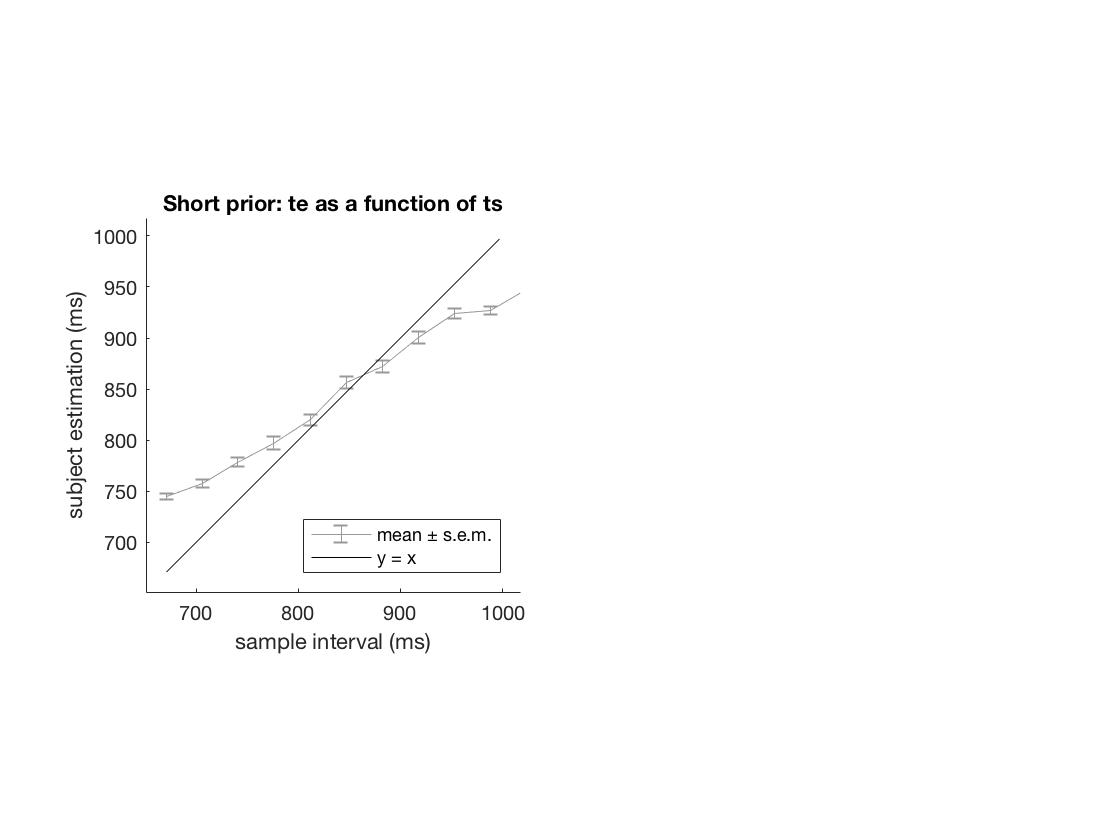

In [18]:
imatlab_export_fig('print-png')
clearvars;
% ... Observed mean ± s.e.m. values for data
figure();
a = 20; % Factor for formatting axes
% ... Calculate, plot mean ± s.e.m. for short prior
load('short_prior.mat');

% Helper functions to calculate group means, stds, sems
[ts_vals, ~, ts_i] = unique(ts);
te_means = zeros(size(ts_vals)); % Group means
te_stds = zeros(size(ts_vals)); % Group stds
te_sems = zeros(size(ts_vals)); % Group sems
for itr0 = 1:length(ts_vals)
    same_idx = ts_i == itr0;
    same_te = te(same_idx);
    te_means(itr0) = mean(same_te);
    te_stds(itr0) = std(same_te);
    te_sems(itr0) = te_stds(itr0) / sqrt(length(same_te));
end
subplot(1, 2, 1); hold all;
errorbar(ts_vals, te_means, te_sems, 'Color', [.6, .6, .6]);
plot([min(ts), max(te)], [min(ts), max(te)], 'k');
axis([min(ts) - a, max(te) + a, min(ts) - a, max(te) + a ], 'square');
xlabel('sample interval (ms)'); ylabel('subject estimation (ms)');
title('Short prior: te as a function of ts');
legend('mean ± s.e.m.', 'y = x', 'Location', 'SE');

This behavior suggests that the subject's estimated intervals are biased by knowledge of the underlying distribution from which sample intervals are drawn. We can model this behavior using a Bayesian inference framework. We will assume that the subject makes a noisy measurement (denoted $t_m$) of the sample interval ($t_s$) and then uses this measurement to produce a Bayesian estimate ($t_e$).

** NOTE:** To be more correct we should also model the subject's "motor noise" in reporting their Bayesian estimate. However, we will ignore this source of variance here. Also, we will assume the subject approximates the true *discrete* uniform prior distribution of $t_s$ as a *continuous* uniform distribution. This is a reasonable assumption because the subject cannot perfectly measure the true sample intervals.

#### The noisy measurement process defines our likelihood function
For simplicity, we will model the noisy measurement process as sampling $t_m$ from a Gaussian distribution with mean $t_s$ (the true sample interval) and standard deviation $\sigma_m$ (some fixed value we will fit to the data). Intuitively, if $\sigma_m$ is very small, then the measurements are narrowly distributed around the true interval. If $\sigma_m$ is large, then the measurements are more broadly distributed around the true interval (measurement process is more noisy).

$$ \operatorname{Likelihood} \quad P(t_m | t_s) = Gaussian(t_s, \sigma_m) $$



#### The estimated interval takes into account both the likelihood and the prior
Under our model, the subject's Bayesian estimate ($t_e$) is the interval with the maximum probability under the posterior distribution (the "maximum a posteriori" or MAP estimate). The posterior probability distribution is given by Bayes' Rule:
$$ \operatorname{Posterior} \quad P(t_s | t_m) = \frac{P(t_m | t_s) P(t_s)}{P(t_m)}$$

The MAP estimate is the value of $t_s$ that maximizes the posterior distribution: $t_e = \arg\max{\text\{Posterior}(t_s)\}$. Since the denominator does not depend on $t_s$, it is equivalent to say that $t_e$ is the value of $t_s$ that maximizes:

$$ P(t_s | t_m) \propto P(t_m | t_s) P(t_s)$$

We have framed the model! For a given $t_s$, the model will predict $t_e$ according to:

$$t_e = \underset{t_s}{\operatorname{argmax}} \big( \operatorname{Likelihood}(t_s, \sigma_m) \times \operatorname{Prior}(t_s) \big)$$

The prior is simply a uniform distribution between $t_{s, min}$ and $t_{s, max}$. The likelihood function is a Gaussian distribution. The standard deviation $\sigma_m$ is a free parameter that we will use to fit the model to behavioral data.

Jazayeri, M. and Shadlen, M.N. (2010). Temporal context calibrates interval timing. Nature Neuroscience. 13 (8):1020-6.

In [12]:
imatlab_export_fig('print-png')
t = linspace(0,6*pi,100);
plot(sin(t))
grid on
hold on
plot(cos(t), 'r')